###  GRIP: The Sparks Foundation

Data Science and Business Analytics Intern  


   Ashish Kumar

###  Task 1 : Prediction Using Supervised Machine Learning

In this task we have to predict the percentage of an student based on the no of study hours.

In [1]:
# Importing the all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the data 
df = pd.read_csv("student_scores - student_scores.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
# checking the null value
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# Describe the data set
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


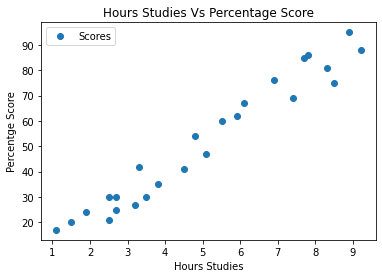

In [8]:
# plotting the distribution of score
df.plot(x = 'Hours' , y = 'Scores' , style = 'o')
plt. xlabel('Hours Studies')
plt.ylabel("Percentge Score")
plt.title("Hours Studies Vs Percentage Score")
plt.show()

###  Preparing the data

In [9]:
# the next step is to devide the data as input and output
x = df.iloc[:, :-1].values 
y = df.iloc[:, 1].values  

In [10]:
# Split the data 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y , test_size = 0.20 , random_state = 0)


### Train the Model

In [11]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression() 
reg_model.fit(x_train, y_train)

LinearRegression()

In [12]:
reg_model.score(x_train, y_train)

0.9515510725211552

In [13]:
reg_model.score(x_test, y_test)

0.9454906892105354

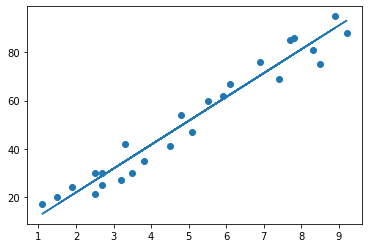

In [14]:
# Plotting the regression line
line = reg_model.coef_*x+reg_model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

###  Predictions the x_test value
Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
print(x_test)
y_pred = reg_model.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Prediction on given data point if a student studies 9.25 hr/day

In [17]:
reg_model.predict(np.array([9.25]).reshape(1,1))

array([93.69173249])

if a student studied for 9.25 hrs/day then we will score approx 93.692%

### Model Evolution

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:',  metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [19]:
print('R2 square :' , metrics.r2_score(y_test,y_pred))

R2 square : 0.9454906892105354
